# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/titli/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


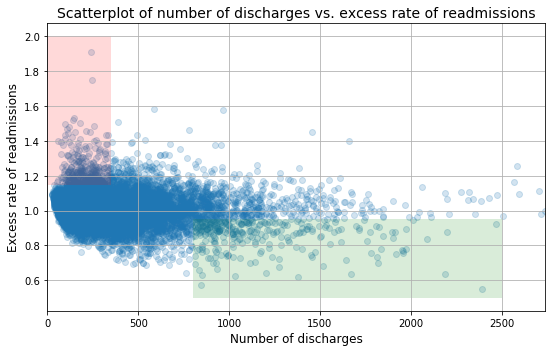

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

###  Do you agree with the analysis.

The preliminary report is only based on one graph and is missing statistical analysis. My critiques are as follows.

1) The missing data was handled properly above by dropping rows with null values (except for Footnote columns).

2) Initial observations is entirely based on plot alone and not tested for statistical significance and correlation coefficient was not calculated.

3) No "Hypothesis test" is done. 

4) The hospital capacity was grouped only into two: (a) number of discharges > 1000 and (b)number of discharges < 100. There is another group of 100 <=number of discharges<=1000 was left out. This means the calculated percentages of hospitals with excess readmission rate (63% and 44%) is only for the two groups missing a big chunk of the hospitals in the population.

4) Conclusions were not back up with a solid statistical analysis and Hypothesis testing for proof.

### Provide support for your arguments and your own recommendations with a statistically sound analysis:

In [6]:
print(hospital_read_df.shape)
hospital_read_df.isnull().sum()

(16860, 12)


Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [7]:
missing=hospital_read_df[hospital_read_df['Number of Discharges']=='Not Available']
missing.isnull().sum()


Hospital Name                    0
Provider Number                  0
State                            0
Measure Name                     0
Number of Discharges             0
Footnote                      2234
Excess Readmission Ratio      3048
Predicted Readmission Rate    3048
Expected Readmission Rate     3048
Number of Readmissions        5282
Start Date                       0
End Date                         0
dtype: int64

In [8]:
hospital_new=hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
hospital_new.shape

(11578, 12)

### Null Hypothesis test
Ho: There is no significant correlation between hospital capacity(number of discharges) and readmission rates.
<br>
H1: There is significant correlation between hospital capacity(number of discharges) and readmission rates.


In [11]:
hospital_new= hospital_new[hospital_new['Number of Readmissions'].notnull()]
hospital_new.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [12]:
hospital_new['Number of Discharges']=pd.to_numeric(hospital_new['Number of Discharges'])
hospital_new.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


For pairs from an uncorrelated bivariate normal distribution, the sampling distribution of a certain function of Pearson's correlation coefficient follows Student's t-distribution with degrees of freedom n − 2. Specifically, if the underlying variables have a bivariate normal distribution, the variable
<br>
t=r$\sqrt{\frac{n-2}{1-r^2}}$


Statistical significance and practical significance differ in this scenario where the small correlation (weak relationship) of number of discharges and excess readmission ration is very small but significant. The practical importance is seen using r_squared(Pearson correlation coefficient squared = 0.0095)<1%. This means that only 1% of variability in excess readmission ratio can be explained by number of discharges.



In [33]:
# Compute observed correlation: r_obs
r_obs = np.corrcoef(hospital_new['Number of Discharges'], hospital_new['Number of Readmissions'])[0,1]
n= len(hospital_new['Number of Discharges'])
t=r_obs*math.sqrt((n-2)/(1-r_obs**2))
print('Pearson coeffiecient is {:0.3} and t-statistics score is {:0.3}'.format(r_obs,t))
print('Pearson coeffiecient squared is {:0.3}'.format(r_obs**2)+' < 1 % means that only \
1% of variability in excess readmission ratio can be explained by number of discharges.')


11497
Pearson coeffiecient is 0.791 and t-statistics score is 1.39e+02
Pearson coeffiecient squared is 0.626 < 1 % means that only 1% of variability in excess readmission ratio can be explained by number of discharges.


### Statistical method to get p-value

In [ ]:
import scipy.stats as stats
p_value1 = stats.t.sf(np.abs(t), n-2)*2  # two-sided pvalue = Prob(abs(t)>tt)
print('p-value =', p_value1)

### Bootstrap to get p-value

In [15]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


a= hospital_new['Number of Discharges']
b= hospital_new['Number of Readmissions']
empirical_diff_means = np.mean(a)-np.mean(b)
concat_mat = pd.concat([a,b], axis=1)     
mean_concat = np.mean(concat_mat)
# Generate shifted arrays
a_shifted = a - np.mean(a) + mean_concat
b_shifted = b - np.mean(b) + mean_concat

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value is {:0.3}.' .format(p))

p-value is 0.0.


/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


### Q3B. Report statistical significance for $\alpha$ = .01
The statistical significance for $\alpha$=.01 will be the same as when $\alpha$=.05 because p_value will be calculated the same way and assumed  $\alpha$ will not be part of p_value calculation.

### Q4B. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client? (change)

Statistical significance means that difference in groups is not likely due to sampling error and this difference (even if very small) is significant when sample size is large. p <0.05 so according to 'Null Hypothesis' H1 is accepted which states that there is significant correlation between hospital capacity(number of discharges) and readmission rates.

The practical significance of the data set is thsample size is 11497 which is large enough and Pearson correlation coefficient squared = 0.0095)<1%. This means that only 1% of variability in excess readmission ratio can be explained by number of discharges.


The data from thepreliminary report is divded into few groups as discussed below.

#### Division of dataset
group1: Number of Discharges >1000
<br>
group1_1: group1 with Excess Readmission Ratio >1
<br>
group1_2: group1 with Excess Readmission Ratio <=1
<br>
hosp1: Excess Readmission Ratio <=1
<br>
hosp2: Excess Readmission Ratio > 1

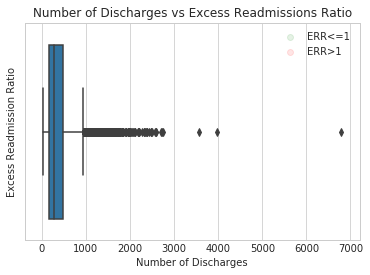

In [17]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x=hospital_new['Number of Discharges'])
#Large hospitals with Number of Discharges>1000 are obly 463
group1=hospital_new[hospital_new['Number of Discharges']>1000]
group1_1=group1[group1['Excess Readmission Ratio']>1]
group1_2=group1[group1['Excess Readmission Ratio']<=1]
hosp1=hospital_new[hospital_new['Excess Readmission Ratio']<=1]
hosp2=hospital_new[hospital_new['Excess Readmission Ratio']>1]
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

### Statistical analysis based on hospital groups hosp1 and hosp2

In [31]:
import scipy.stats as stats
p1=(hosp1.shape[0])/(hosp1.shape[0]+hosp2.shape[0])
p2=(hosp2.shape[0])/(hosp1.shape[0]+hosp2.shape[0])
mean_dis_diff=np.mean(hosp1['Number of Discharges'])-np.mean(hosp2['Number of Discharges'])
mean_dis_diff
#standard deviation for difference in mean of # of discharges
std_dis_diff=np.sqrt((np.mean(hosp1['Number of Discharges'])**2/hosp1.shape[0]) + \
                      (np.mean(hosp1['Number of Discharges'])**2/hosp2.shape[0]))
##Using 0.05 significance level
moe=1.96*std_dis_diff
## confidence interval for difference in number of discharges
ci = mean_dis_diff + np.array([-1, 1]) * moe
n1=hosp1.shape[0]
n2=hosp2.shape[0]
H1=(np.mean(hosp1['Number of Discharges'])**2)/n1
H2=(np.mean(hosp2['Number of Discharges'])**2)/n2

DF=((H1+H2)**2)/(((H1**2)/n1)+((H2**2)/n2))
t_val=(mean_dis_diff-0)/std_dis_diff
t_val
p_value = stats.t.sf(np.abs(t_val), DF)*2 
print('p values is {:0.3}'.format(p_value))
print('confidence interval of 95% are',ci)

p values is 1.68e-05
confidence interval of 95% are [16.69519756 44.59003237]


p_value <0.05 and also <0.01 which means Ho can be rejected and H1 will be accepted
H1: There is significant difference between "number of discharges" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1. There is 99.95% confidence that this difference in mean of number of discharge is 16.7 to 44.6.

### QB5 What are the advantages and disadvantages of using this plot to convey information?

Advantages: It has clear labels of axis titles and what it is all about

Disadvantages: It is difficult to see the difference or boundary of in the samples that have excess readmission ration <=1 and those>1. It can be represented by different colors. 

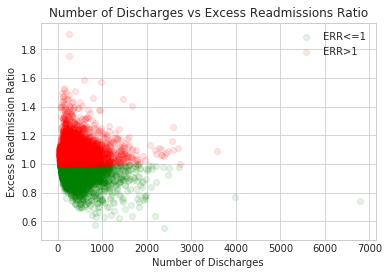

In [27]:
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()